In [6]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
data = pd.read_csv('cf-df.csv',index_col=0)
data = reduce_mem_usage(data)

Memory usage of dataframe is 384000000.00 MB
Memory usage after optimization is: 99034456.00 MB
Decreased by 74.2%


In [4]:
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,creditY
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,941459.0,1000000.000000,1.000000e+06,1000000.000000,...,949619.0,949618.0,949619.0,958367.0,912673.0,949619.0,949619.0,949619.0,1000000.0,1000000.0
mean,499999.500000,14420.845925,3.482534,NaN,NaN,72091.429688,NaN,0.614190,7.619747e+04,1.009832,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
std,288675.278932,8720.358533,0.855704,0.000000,NaN,106647.140625,0.0,0.675692,7.077645e+04,0.782519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
min,0.000000,500.000000,3.000000,5.308594,14.007812,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
25%,249999.750000,8000.000000,3.000000,9.750000,248.500000,427.000000,2.0,0.000000,4.567103e+04,0.000000,...,5.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,2588.0,11.0
50%,499999.500000,12000.000000,3.000000,12.742188,375.500000,7782.000000,6.0,1.000000,6.500000e+04,1.000000,...,7.0,13.0,5.0,11.0,0.0,0.0,0.0,2.0,2984.0,14.0
75%,749999.250000,20000.000000,3.000000,15.992188,580.500000,118112.000000,10.0,1.000000,9.000000e+04,2.000000,...,10.0,19.0,7.0,14.0,0.0,0.0,0.0,3.0,3318.0,20.0
max,999999.000000,40000.000000,5.000000,30.984375,1715.000000,378351.000000,10.0,5.000000,1.099920e+07,2.000000,...,83.0,128.0,45.0,90.0,4.0,4.0,39.0,30.0,4200.0,71.0


In [5]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证

train = data[:800000]
test = data[800000:]
test.drop('isDefault',axis=1,inplace=True)

features = [f for f in train.columns if f not in ['id','issueDate','isDefault','earliesCreditLine']]
X_train = train[features]
X_test = test[features]
y_train = train['isDefault']


# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

F:\Anaconda\envs\kaggle\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[375]	valid_0's auc: 0.733863


未调参前lightgbm单模型在验证集上的AUC：0.7338630125774208


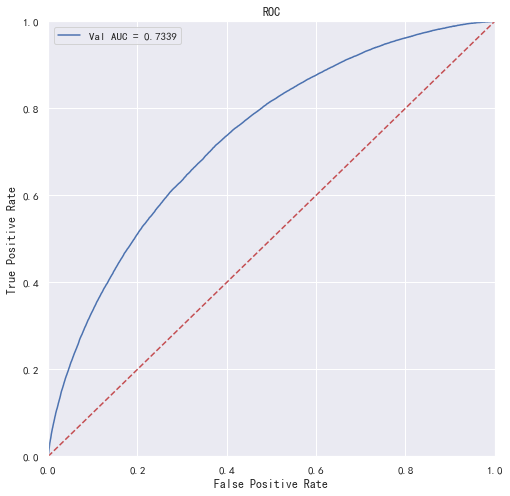

In [7]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [8]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
        
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[487]	valid_0's auc: 0.735138
[0.7351378857315147]
************************************ 2 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[418]	valid_0's auc: 0.731549
[0.7351378857315147, 0.7315493290321695]
************************************ 3 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[465]	valid_0's auc: 0.734482
[0.7351378857315147, 0.7315493290321695, 0.7344819413942962]
************************************ 4 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[529]	valid_0's auc: 0.734162
[0.7351378857315147, 0.7315493290321695, 0.7344819413942962, 0.7341619845249269]
************************************ 5 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[420]	valid_0's auc: 0.733342
[0.7351378857315147, 0.7315493290321695, 0.7344819413942962, 0.7341619845249269, 0.7333422251269688]
lgb_scotrainre_list:[0.7351378857315147, 0.7315493290321695, 0.7344819413942962, 0.7341619845249269, 0.7333422251269688]
lgb_score_mean:0.7337346731619752
lgb_score_std:0.0012361031310626233


### 贝叶斯调参

In [9]:
from sklearn.model_selection import cross_val_score

"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', bjective='binary', metric='auc',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    
    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5, scoring='roc_auc').mean()
    
    return val

In [11]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10),
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7101   |  0.5499   |  95.73    |  0.5998   |  19.8     |  4.414    |  79.46    |  0.2788   |  135.3    |  1.229    |  4.538    |
|  2        |  0.7323   |  0.8175   |  58.3     |  0.9629   |  15.43    |  6.371    |  69.8     |  0.5508   |  182.8    |  8.905    |  5.463    |
|  3        |  0.7253   |  0.8024   |  7.226    |  0.8626   |  19.88    |  2.647    |  70.47    |  0.8008   |  69.26    |  5.726    |  9.841    |
|  4        |  0.725    |  0.8392   |  54.54    |  0.9856   |  7.309    |  2.764    |  51.68    |  0.0457   |  20.34    |  9.787    |  5.612    |
|  5        |  0.7348   |  0.9249   |  41.31    |  0.5547   |  18.08    |  5.479    |  97.47    |  0.5921   |  54.28    |  6

In [12]:
bayes_lgb.max

{'target': 0.7351440107578089,
 'params': {'bagging_fraction': 1.0,
  'bagging_freq': 31.75795863070365,
  'feature_fraction': 0.571556569033099,
  'max_depth': 11.19181516081979,
  'min_child_weight': 9.290306307184125,
  'min_data_in_leaf': 96.77439070966646,
  'min_split_gain': 0.41801277855506597,
  'num_leaves': 69.56125632990224,
  'reg_alpha': 10.0,
  'reg_lambda': 1.5215799556154528}}

In [18]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 70,
                    'max_depth': 11,
                    'min_data_in_leaf': 96,
                    'min_child_weight':9.29,
                    'bagging_fraction': 1.0,
                    'feature_fraction': 0.57,
                    'bagging_freq': 32,
                    'reg_lambda': 1.52,
                    'reg_alpha': 10,
                    'min_split_gain': 0.42,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
}

cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    metrics='auc',
    seed=0
)

print('迭代次数{}'.format(len(cv_result_lgb['auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['auc-mean'])))

迭代次数3113
最终模型的AUC为0.7367640793497252


**模型参数已经确定，建立最终模型并对验证集进行验证**

In [23]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 70,
                    'max_depth': 11,
                    'min_data_in_leaf': 96,
                    'min_child_weight':9.29,
                    'bagging_fraction': 1.0,
                    'feature_fraction': 0.57,
                    'bagging_freq': 32,
                    'reg_lambda': 1.52,
                    'reg_alpha': 10,
                    'min_split_gain': 0.42,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=14269, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.735628
[2000]	valid_0's auc: 0.737662
[3000]	valid_0's auc: 0.738178
Early stopping, best iteration is:
[3609]	valid_0's auc: 0.738454
[0.7384540991598774]
************************************ 2 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.73206
[2000]	valid_0's auc: 0.734032
[3000]	valid_0's auc: 0.734613
Early stopping, best iteration is:
[3675]	valid_0's auc: 0.7349
[0.7384540991598774, 0.7349004000164917]
************************************ 3 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.73525
[2000]	valid_0's auc: 0.737459
[3000]	valid_0's auc: 0.73809
Early stopping, best iteration is:
[3610]	valid_0's auc: 0.738339
[0.7384540991598774, 0.7349004000164917, 0.7383387062372216]
************************************ 4 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.734729
[2000]	valid_0's auc: 0.737073
[3000]	valid_0's auc: 0.737838
Early stopping, best iteration is:
[3430]	valid_0's auc: 0.73804
[0.7384540991598774, 0.7349004000164917, 0.7383387062372216, 0.7380397670204354]
************************************ 5 ************************************


F:\Anaconda\envs\kaggle\lib\site-packages\lightgbm\basic.py:794: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.733496
[2000]	valid_0's auc: 0.735691
[3000]	valid_0's auc: 0.736432
Early stopping, best iteration is:
[3451]	valid_0's auc: 0.736697
[0.7384540991598774, 0.7349004000164917, 0.7383387062372216, 0.7380397670204354, 0.7366974196254428]
lgb_scotrainre_list:[0.7384540991598774, 0.7349004000164917, 0.7383387062372216, 0.7380397670204354, 0.7366974196254428]
lgb_score_mean:0.7372860784118938
lgb_score_std:0.0013474661330196147


通过5折交叉验证可以发现，模型迭代次数在3600次的时候会停止，那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测

Training until validation scores don't improve for 200 rounds
[400]	valid_0's auc: 0.726935
[800]	valid_0's auc: 0.732147
[1200]	valid_0's auc: 0.734361
[1600]	valid_0's auc: 0.73531
[2000]	valid_0's auc: 0.735691
[2400]	valid_0's auc: 0.735945
[2800]	valid_0's auc: 0.736307
[3200]	valid_0's auc: 0.736536
[3600]	valid_0's auc: 0.736697
Did not meet early stopping. Best iteration is:
[3451]	valid_0's auc: 0.736697
调参后lightgbm单模型在验证集上的AUC：0.7366974196254428


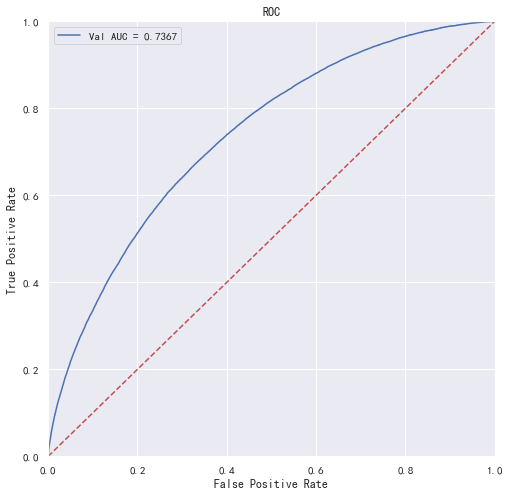

In [24]:
""""""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 70,
                    'max_depth': 11,
                    'min_data_in_leaf': 96,
                    'min_child_weight':9.29,
                    'bagging_fraction': 1.0,
                    'feature_fraction': 0.57,
                    'bagging_freq': 32,
                    'reg_lambda': 1.52,
                    'reg_alpha': 10,
                    'min_split_gain': 0.42,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
}

"""使用训练集数据进行模型训练"""
final_model_lgb = lgb.train(base_params_lgb, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=3600, verbose_eval=400, early_stopping_rounds=200)

"""预测并计算roc的相关指标"""
val_pre_lgb = final_model_lgb.predict(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('调参后lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [21]:
"""保存模型到本地"""
# 保存模型
import pickle
# pickle.dump(final_model_lgb, open('model/model_lgb_best.txt', 'wb'))

gbm.save_model('model.txt')

X这里不好！！

In [27]:
test = pd.read_csv('cf-testa.csv', index_col='id')

In [28]:
pre = final_model_lgb.predict(X_test)
pd.Series(pre, name='isDefault', index=test.index).reset_index().to_csv('submit_lgb_tune.csv', index=False)

In [29]:
test.index

Int64Index([800000, 800001, 800002, 800003, 800004, 800005, 800006, 800007,
            800008, 800009,
            ...
            999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997,
            999998, 999999],
           dtype='int64', name='id', length=200000)

线上 0.7343